In [178]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [179]:
def extract_latency_data(filename):
    data = pd.read_csv(filename)
    
    data_copy = data[6:]
    
    data_copy.columns = ['X-axis', 'Latency (ms)']
    
    data_copy['Latency (ms)'] = data_copy['Latency (ms)'].astype(float) * 1000
    
    return data_copy

In [180]:
WITHOUT_OFFLOADING = "results/20240211-192454_workerhash_results.csv"
WITH_OFFLOADING = "results/20240211-192534_workerhash_results.csv"


no_ndp_df_unfiltered = pd.read_csv(WITHOUT_OFFLOADING)
ndp_df_unfiltered = pd.read_csv(WITH_OFFLOADING)

In [181]:
# Filter out the first 4 rows
no_ndp_df = no_ndp_df_unfiltered[6:]
ndp_df = ndp_df_unfiltered[6:]

# Rename the columns to Iteration and Latency(ms)
no_ndp_df.columns = ["Iteration", "Latency(ms)"]
ndp_df.columns = ["Iteration", "Latency(ms)"]


# Convert s to ms
no_ndp_df["Latency(ms)"] = no_ndp_df["Latency(ms)"].astype(float) * 1000
ndp_df["Latency(ms)"] = ndp_df["Latency(ms)"].astype(float) * 1000


ndp_df

C:\Users\DDJen\AppData\Local\Temp\ipykernel_35780\4056401983.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_ndp_df["Latency(ms)"] = no_ndp_df["Latency(ms)"].astype(float) * 1000
C:\Users\DDJen\AppData\Local\Temp\ipykernel_35780\4056401983.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndp_df["Latency(ms)"] = ndp_df["Latency(ms)"].astype(float) * 1000


,Iteration,Latency(ms)
6,0,251.874
7,1,239.870
8,2,242.174
9,3,240.028
10,4,239.497
...,...,...
101,95,242.106
102,96,239.399
103,97,240.737
104,98,241.287


In [182]:
no_ndp_df

,Iteration,Latency(ms)
6,0,372.374
7,1,360.004
8,2,359.267
9,3,351.562
10,4,347.896
...,...,...
101,95,352.585
102,96,356.973
103,97,351.266
104,98,356.703


### Latency Comparison

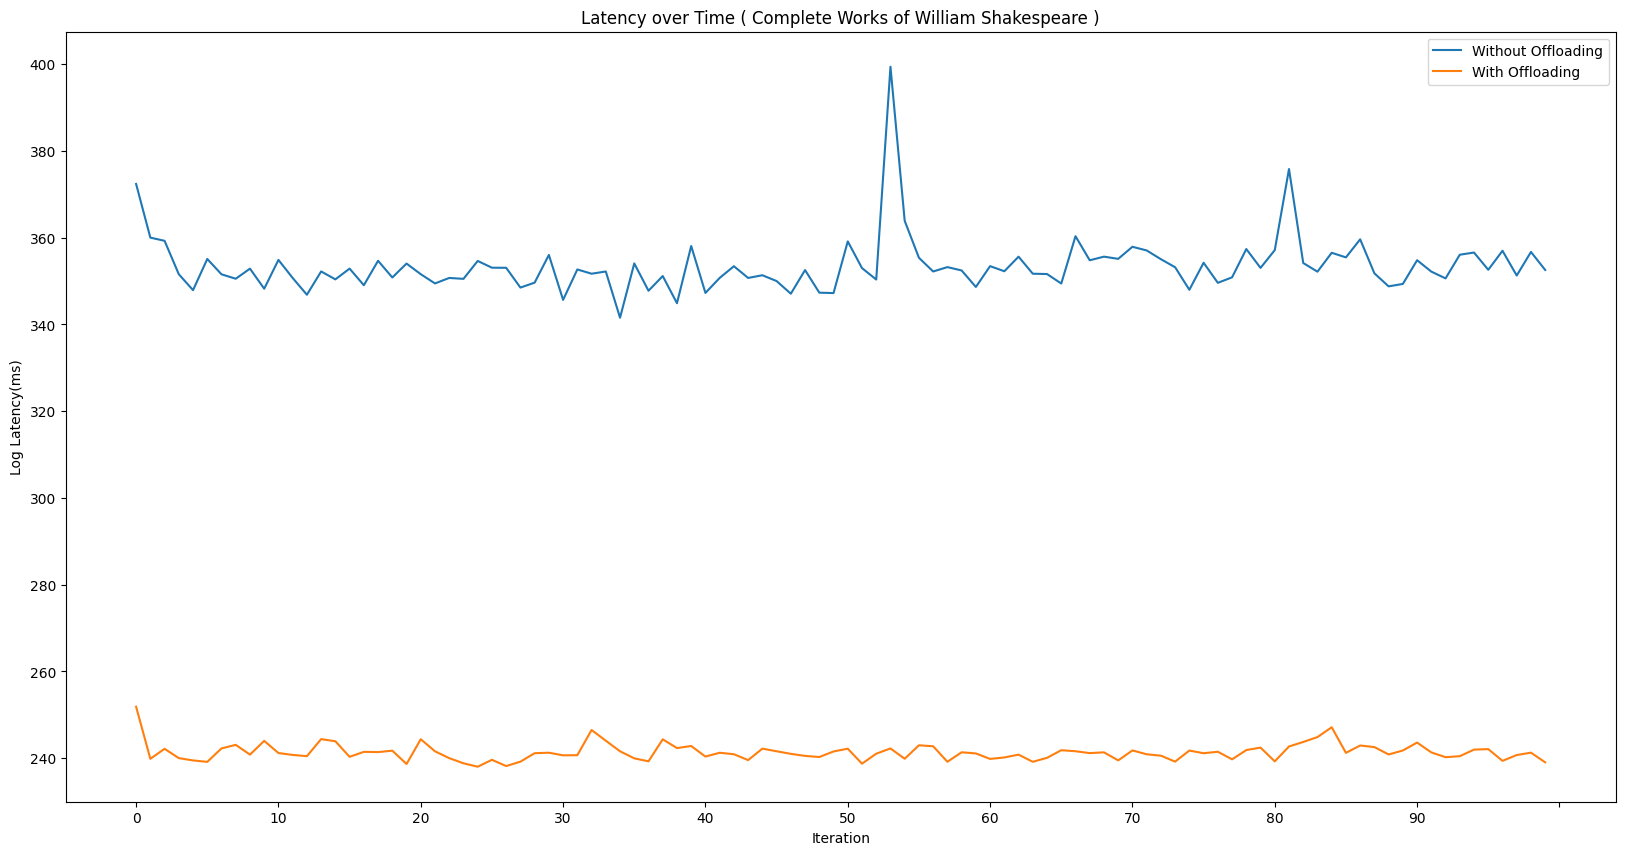

In [183]:
# plot latency over time
plt.plot(no_ndp_df["Iteration"], no_ndp_df["Latency(ms)"], label="Without Offloading")

# log scale
#plt.yscale("log")

plt.plot(ndp_df["Iteration"], ndp_df["Latency(ms)"], label="With Offloading")

# Increase the size of the plot
plt.rcParams["figure.figsize"] = (15, 10)

# x labels every 10 iterations
plt.xticks(np.arange(0, 101, 10))

# 
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Log Latency(ms)")
plt.title("Latency over Time ( Complete Works of William Shakespeare )")
plt.show()

### Evaluation of Wordcount on KJV Bible with increasing Throughput

In [184]:
kjv_bible_ndp = "./results/20240212-231821_roundrobin_ndp-False_async-True_results.csv"
kjv_bible_no_ndp = "./results/20240212-231931_roundrobin_ndp-True_async-True_results.csv"


kjv_bible_ndp_df = extract_latency_data(kjv_bible_ndp)
kjv_bible_no_ndp_df = extract_latency_data(kjv_bible_no_ndp)

C:\Users\DDJen\AppData\Local\Temp\ipykernel_35780\2260050967.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_copy['Latency (ms)'] = data_copy['Latency (ms)'].astype(float) * 1000
C:\Users\DDJen\AppData\Local\Temp\ipykernel_35780\2260050967.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_copy['Latency (ms)'] = data_copy['Latency (ms)'].astype(float) * 1000


In [185]:
kjv_bible_ndp_df

,X-axis,Latency (ms)
6,1,222.381072
7,2,227.772341
8,3,224.502629
9,4,219.162550
10,5,224.050493
11,6,223.377557
12,7,226.906272
13,8,226.671404
14,9,230.407178
15,10,230.876851


In [186]:
kjv_bible_no_ndp_df

,X-axis,Latency (ms)
6,1,218.942514
7,2,227.689333
8,3,223.791131
9,4,221.101975
10,5,223.612448
11,6,225.392464
12,7,226.045674
13,8,227.928049
14,9,228.764740
15,10,231.660215


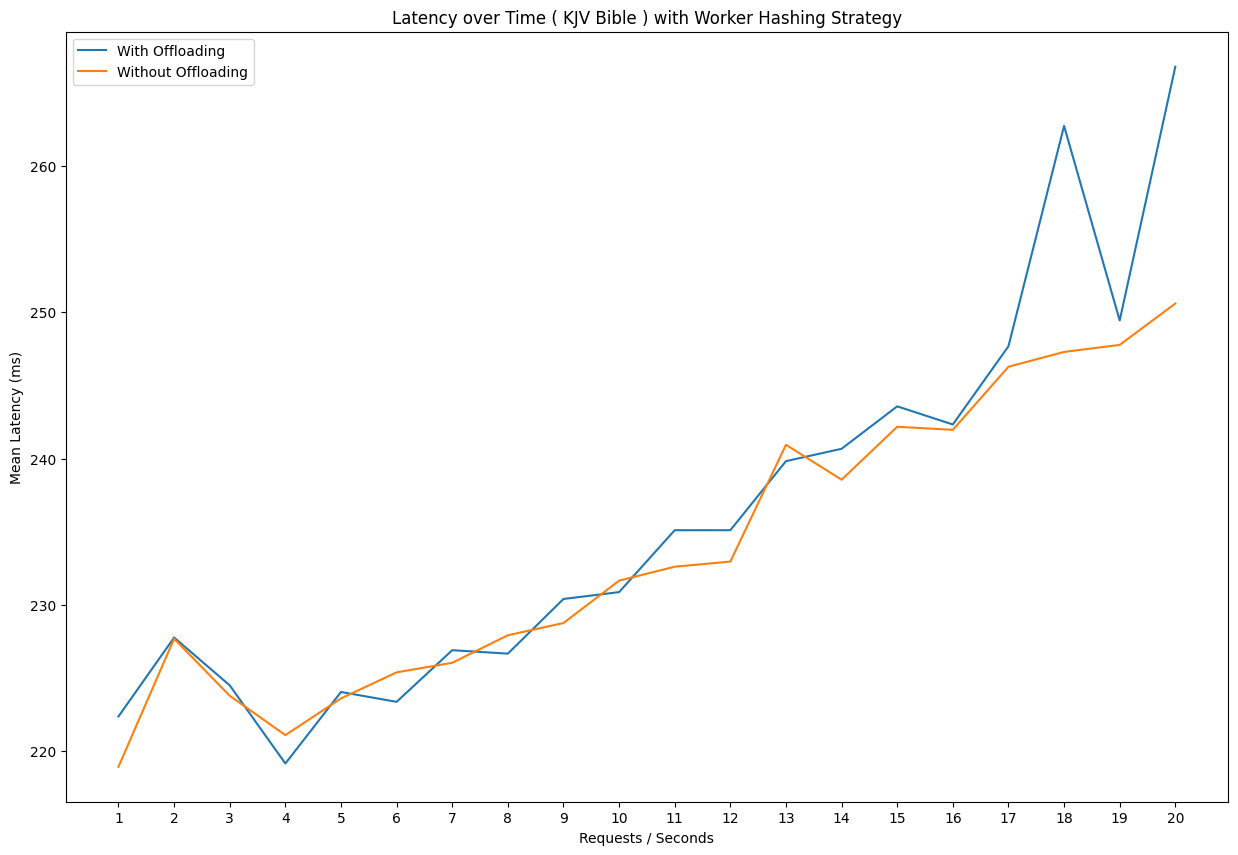

Average Latency for KJV Bible with Offloading:  235.96904202715126
Average Latency for KJV Bible without Offloading:  233.80523020390768


In [187]:
# Plot the latency over time
plt.plot(kjv_bible_ndp_df["X-axis"], kjv_bible_ndp_df["Latency (ms)"], label="With Offloading")
plt.plot(kjv_bible_no_ndp_df["X-axis"], kjv_bible_no_ndp_df["Latency (ms)"], label="Without Offloading")

# Increase the size of the plot
plt.rcParams["figure.figsize"] = (20, 10)

# x labels every 10 iterations
#plt.xticks(np.arange(0, , 50))

plt.legend()
plt.xlabel("Requests / Seconds")
plt.ylabel("Mean Latency (ms)")

plt.title("Latency over Time ( KJV Bible ) with Worker Hashing Strategy")
plt.show()

# Determine what is the average latency for each of the datasets
print("Average Latency for KJV Bible with Offloading: ", kjv_bible_ndp_df["Latency (ms)"].mean())
print("Average Latency for KJV Bible without Offloading: ", kjv_bible_no_ndp_df["Latency (ms)"].mean())

### Throughput Testing with increment

In [188]:
throughput_testing_file = "./results/1000_request_kjv_wordcount_forbid_ndp_async.csv"

In [189]:

throughput_testing_file_df = extract_latency_data(throughput_testing_file)

C:\Users\DDJen\AppData\Local\Temp\ipykernel_35780\2260050967.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_copy['Latency (ms)'] = data_copy['Latency (ms)'].astype(float) * 1000


In [190]:
throughput_testing_file_df


,X-axis,Latency (ms)
6,1,216.601077
7,11,233.310230
8,21,252.208032
9,31,266.517810
10,41,308.300826
...,...,...
101,951,469.365349
102,961,465.208733
103,971,468.565776
104,981,466.134585


6        1
7       11
8       21
9       31
10      41
      ... 
101    951
102    961
103    971
104    981
105    991
Name: X-axis, Length: 100, dtype: object


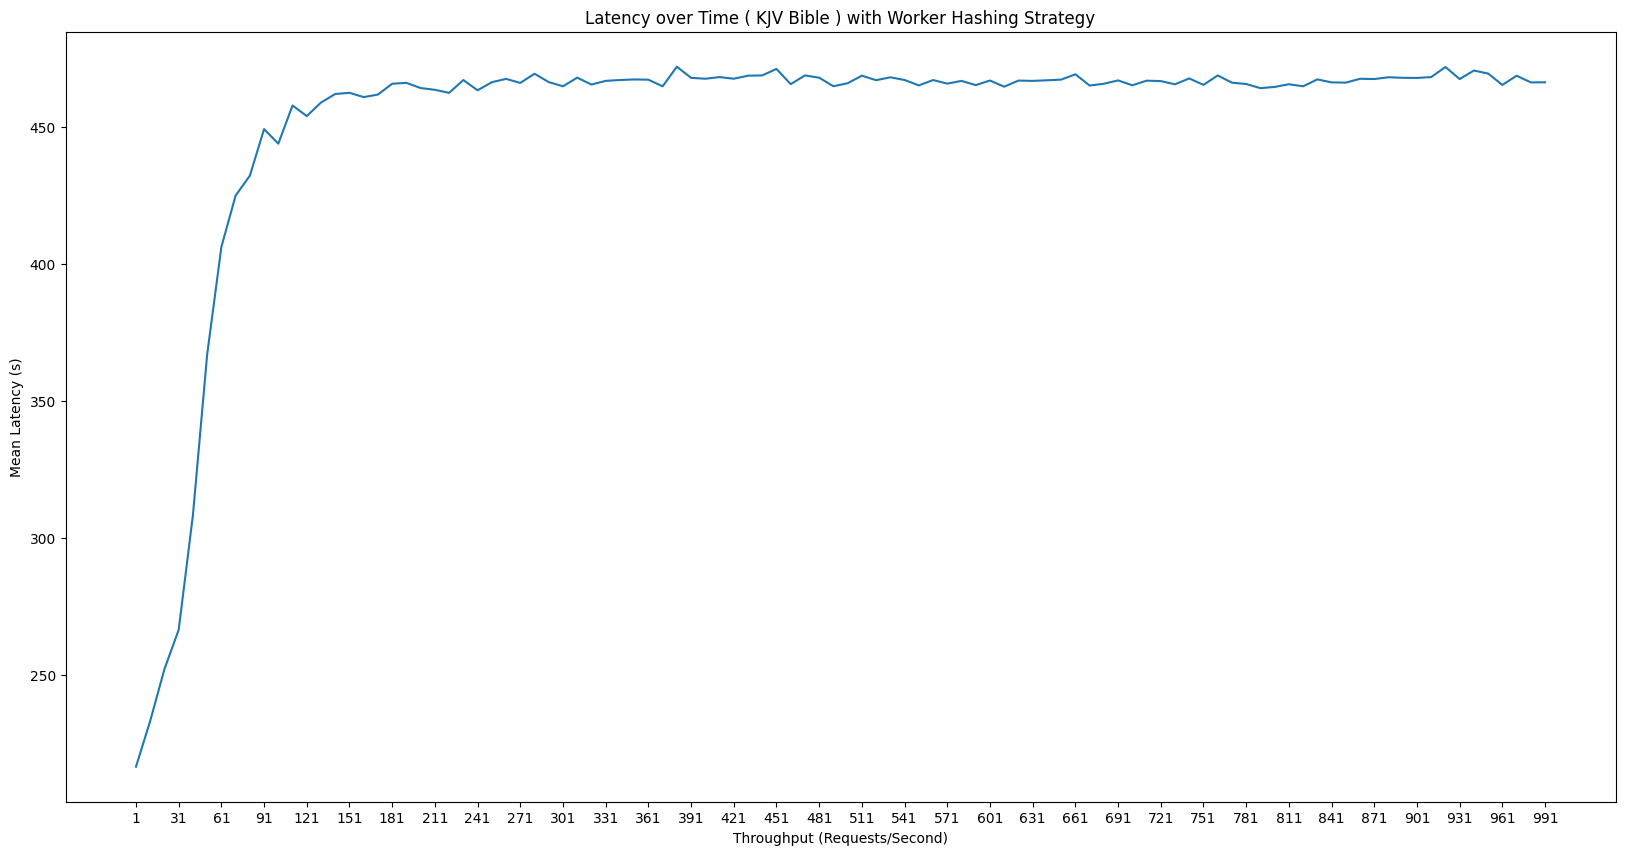

In [198]:
plt.plot(throughput_testing_file_df["X-axis"], throughput_testing_file_df["Latency (ms)"], label="With Offloading")
plt.xlabel("Throughput (Requests/Second)")
plt.ylabel("Mean Latency (s)")
plt.title("Latency over Time ( KJV Bible ) with Worker Hashing Strategy")

plt.xticks(np.arange(0, 100, 3))

print(throughput_testing_file_df["X-axis"])